# How can we predict the quality of wine based on its physical characteristics?
We will download the wine_quality dataset from Tensorflow (the Keras backend) to train a neural network to predict wine quality.

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
# from tensorflow.keras.optimizers import SGD, Adam
# from tensorflow.keras.activations import relu
import tensorflow_datasets as tfds
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
#if you want to load the data as tuples, you can use the as_supervised=True argument
data_train = tfds.load('wine_quality',split='train',as_supervised=True)

#looking at just one sample of our data
pt = data_train.take(1)
# type(pt)

#can convert this TakeDataset object to a numpy array (can do this for the whole dataset too)
print("Features and label for first entry")
for features, label in tfds.as_numpy(pt):
    print(features,label)

#we want to load dataset as a dictionary of tf.Tensors (can't transform tuples to dataframe)
data_train_white = tfds.load('wine_quality/white',split='train')
data_train_red = tfds.load('wine_quality/red',split='train')

#transform dictionary to dataframe - combining red and white wine
df_white = tfds.as_dataframe(data_train_white)
df_red = tfds.as_dataframe(data_train_red)
df = pd.concat([df_white,df_red])

print('number of samples',len(df['quality']))

#what are our output possibilities?
print('possible wine quality ratings',df['quality'].unique())

Dataset wine_quality downloaded and prepared to C:\Users\nf238\tensorflow_datasets\wine_quality\white\1.0.0. Subsequent calls will reuse this data.
Features and label for first entry
{'alcohol': 9.0, 'chlorides': 0.054, 'citric acid': 0.34, 'density': 1.0008, 'fixed acidity': 7.6, 'free sulfur dioxide': 44.0, 'pH': 3.22, 'residual sugar': 18.35, 'sulphates': 0.550000011920929, 'total sulfur dioxide': 197.0, 'volatile acidity': 0.32} 5


Dataset wine_quality downloaded and prepared to C:\Users\nf238\tensorflow_datasets\wine_quality\red\1.0.0. Subsequent calls will reuse this data.
number of samples 6497
possible wine quality ratings [5 6 4 8 7 3 9]


In [7]:
#do we have any missing data (empty or NaN entries in features or labels)?
dataNans = df.isnull().values.any()
if not dataNans:
    print("all good!")

all good!


In [8]:
#it's helpful to separate our input features from our target features (quality) 
#so we can later only transform our inputs without changing our labels
labels = df['quality']
df = df.drop(labels='quality',axis=1)
labels.unique()

enc = OneHotEncoder(sparse=False)
labels = enc.fit_transform(labels.to_numpy().reshape(-1,1))

#make our test data
df, df_test, labels, df_testLabels = train_test_split(df,labels,test_size=0.1)

#look at the first 5 entries
df.head()

array([5, 6, 4, 8, 7, 3, 9], dtype=int64)

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
649,9.600000,0.094,0.54,0.99840,9.7,28.0,3.28,2.5,0.82,83.0,0.320
2043,10.300000,0.049,0.21,0.99240,6.3,35.0,3.31,1.8,0.50,163.0,0.190
1769,11.700000,0.038,0.29,0.99088,6.9,28.0,3.01,2.4,0.36,76.0,0.250
50,9.600000,0.090,0.11,0.99650,8.4,16.0,3.19,1.9,0.82,63.0,0.745
1828,9.633333,0.066,0.23,0.99266,6.0,22.0,3.30,1.1,0.47,148.0,0.410


In [12]:
#Are there any Nans in our test data?

dataNans = df.isnull().values.any()
if not dataNans:
    print("all good!")


all good!


In [16]:
df.describe()

,features/alcohol,features/chlorides,features/citric acid,features/density,features/fixed acidity,features/free sulfur dioxide,features/pH,features/residual sugar,features/sulphates,features/total sulfur dioxide,features/volatile acidity
count,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000,5847.000000
mean,10.487415,0.056245,0.318575,0.994729,7.220361,30.479819,3.219064,5.464050,0.532649,115.570549,0.339958
std,1.189678,0.035263,0.145750,0.003003,1.295928,17.856343,0.159889,4.785153,0.149934,56.788409,0.163549
min,8.000000,0.012000,0.000000,0.987110,3.800000,1.000000,2.720000,0.600000,0.220000,6.000000,0.080000
25%,9.500000,0.038000,0.240000,0.992400,6.400000,17.000000,3.110000,1.800000,0.430000,77.000000,0.230000
50%,10.300000,0.047000,0.310000,0.994900,7.000000,29.000000,3.210000,3.000000,0.510000,118.000000,0.290000
75%,11.300000,0.065000,0.390000,0.997000,7.700000,41.000000,3.320000,8.100000,0.600000,156.000000,0.410000
max,14.900000,0.611000,1.660000,1.038980,15.900000,289.000000,4.010000,65.800003,2.000000,440.000000,1.330000


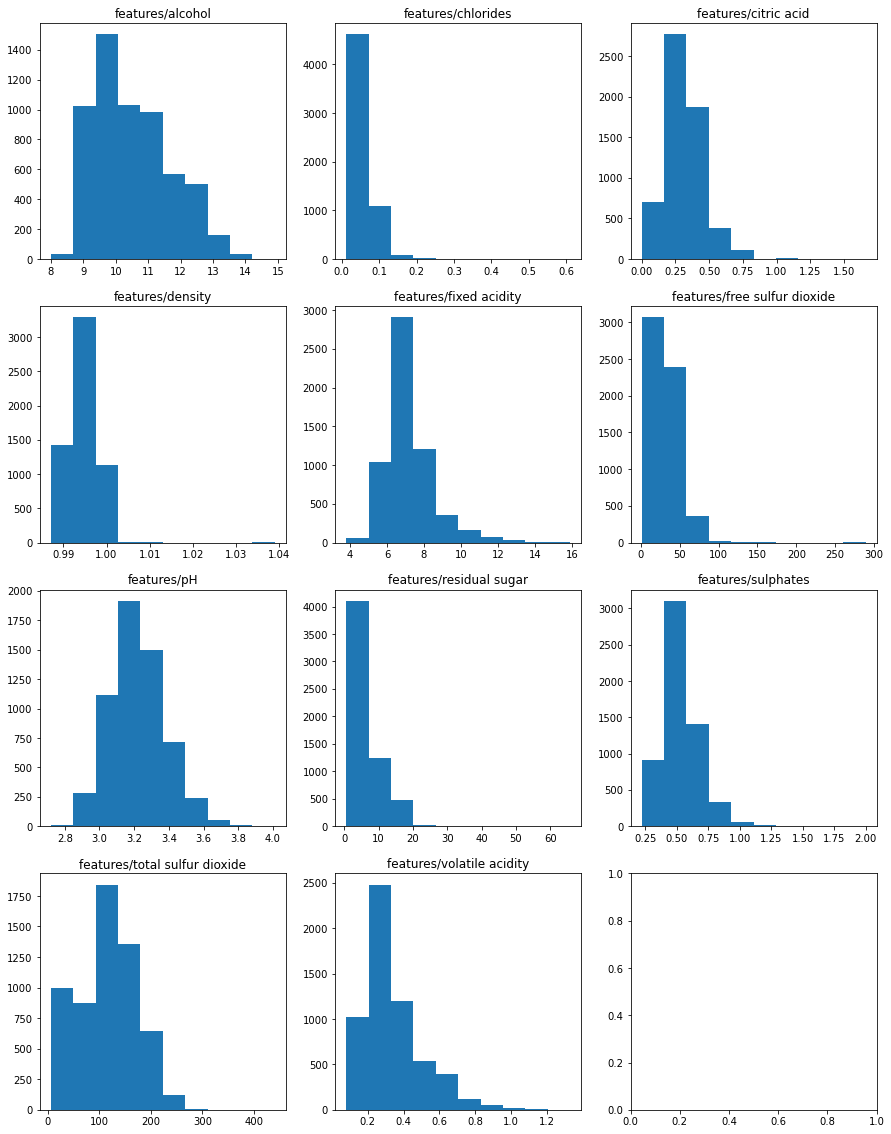

In [17]:
#visualizing our input features
nFeatures = len(df.columns)
nCols = 3
nRows = int(np.ceil(nFeatures/nCols))
cols = df.columns
fig, axs = plt.subplots(nRows,nCols,figsize=(15,20))
# for i, ax in enumerate(axs)
col = 0
for i in range(nRows):
    for j in range(nCols):
        if col >= nFeatures:
            break
        h = axs[i,j].hist(df[cols[col]])
        h = axs[i,j].set_title(cols[col])
        col += 1

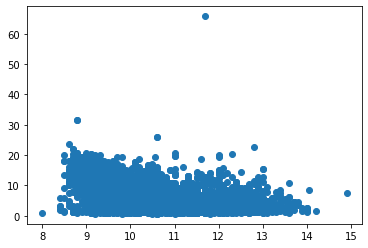

In [21]:
plt.scatter(df['features/alcohol'],df['features/residual sugar'])

In [22]:
# Building the NetworK

cols = df.columns
nClasses = len(labels[0])

#using Keras's Sequential model - https://keras.io/api/models/sequential/
model = Sequential()
#add input layer
model.add(Input(shape=(len(cols),))) #the input layer shape should match the number of features we have
#add first layer of fully connected neurons
model.add(Dense(64,activation='relu'))
#add second layer (first hidden layer)
model.add(Dense(64,activation='relu'))
#and one more because why not
model.add(Dense(64,activation='relu'))
#Add two more layers
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
#finally, our output layer should have only one neuron because we are trying to predict only one number
#notice how there is a different activation function in this layer
#this is because we want our outputs for each class to be a probability
model.add(Dense(nClasses,activation='softmax'))

#compile our model - set our loss metric (categorical cross entropy) and optimizer (stochastic gradient descent)
#how does the model performance change with different optimizers (ie AdaGrad, SGD, etc.)?
model.compile(loss='CategoricalCrossentropy',optimizer='Adam',metrics=['accuracy'])

#let's see a summary of our model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                768       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 455       
Total params: 17,863
Trainable params: 17,863
Non-trainable params: 0
____________________________________________________

In [23]:
#training the model

history = model.fit(
    df, labels,
    validation_split=0.3,
    verbose=1, epochs=120, batch_size=100, shuffle=True)

Epoch 1/120
41/41 [==============================] - 2s 17ms/step - loss: 2.1798 - accuracy: 0.3372 - val_loss: 1.2959 - val_accuracy: 0.4479
Epoch 2/120
41/41 [==============================] - 0s 6ms/step - loss: 1.2992 - accuracy: 0.4174 - val_loss: 1.2620 - val_accuracy: 0.4479
Epoch 3/120
41/41 [==============================] - 0s 5ms/step - loss: 1.2772 - accuracy: 0.4213 - val_loss: 1.2550 - val_accuracy: 0.4638
Epoch 4/120
41/41 [==============================] - 0s 6ms/step - loss: 1.2402 - accuracy: 0.4434 - val_loss: 1.2407 - val_accuracy: 0.4427
Epoch 5/120
41/41 [==============================] - 0s 5ms/step - loss: 1.2348 - accuracy: 0.4344 - val_loss: 1.2375 - val_accuracy: 0.4661
Epoch 6/120
41/41 [==============================] - 0s 6ms/step - loss: 1.2295 - accuracy: 0.4436 - val_loss: 1.2324 - val_accuracy: 0.4490
Epoch 7/120
41/41 [==============================] - 0s 5ms/step - loss: 1.2302 - accuracy: 0.4516 - val_loss: 1.2188 - val_accuracy: 0.4462
Epoch 8/120


Epoch 59/120
41/41 [==============================] - 0s 5ms/step - loss: 1.0513 - accuracy: 0.5170 - val_loss: 1.0984 - val_accuracy: 0.5311
Epoch 60/120
41/41 [==============================] - 0s 5ms/step - loss: 1.0175 - accuracy: 0.5418 - val_loss: 1.0928 - val_accuracy: 0.5322
Epoch 61/120
41/41 [==============================] - 0s 5ms/step - loss: 1.0442 - accuracy: 0.5326 - val_loss: 1.0990 - val_accuracy: 0.5202
Epoch 62/120
41/41 [==============================] - 0s 5ms/step - loss: 1.0346 - accuracy: 0.5349 - val_loss: 1.1011 - val_accuracy: 0.5265
Epoch 63/120
41/41 [==============================] - 0s 6ms/step - loss: 1.0349 - accuracy: 0.5341 - val_loss: 1.1137 - val_accuracy: 0.5236
Epoch 64/120
41/41 [==============================] - 0s 6ms/step - loss: 1.0323 - accuracy: 0.5419 - val_loss: 1.1053 - val_accuracy: 0.5236
Epoch 65/120
41/41 [==============================] - 0s 6ms/step - loss: 1.0138 - accuracy: 0.5463 - val_loss: 1.0965 - val_accuracy: 0.5356
Epoch 

41/41 [==============================] - 0s 6ms/step - loss: 0.9712 - accuracy: 0.5672 - val_loss: 1.0972 - val_accuracy: 0.5464
Epoch 117/120
41/41 [==============================] - 0s 6ms/step - loss: 0.9283 - accuracy: 0.5818 - val_loss: 1.1192 - val_accuracy: 0.5379
Epoch 118/120
41/41 [==============================] - 0s 5ms/step - loss: 0.9310 - accuracy: 0.5841 - val_loss: 1.1217 - val_accuracy: 0.5316
Epoch 119/120
41/41 [==============================] - 0s 6ms/step - loss: 0.9514 - accuracy: 0.5802 - val_loss: 1.1279 - val_accuracy: 0.5413
Epoch 120/120
41/41 [==============================] - 0s 6ms/step - loss: 0.9600 - accuracy: 0.5656 - val_loss: 1.1072 - val_accuracy: 0.5442


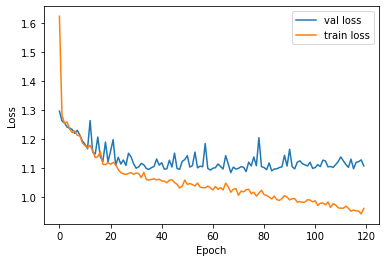

In [25]:
#Visualization of loss function. 
def show_loss(history):
    plt.figure()
    plt.plot(history.history['val_loss'], label="val loss")
    plt.plot(history.history['loss'],label="train loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    
show_loss(history)

In [27]:
#Evaluate our model's performance
#adding more nueron's decreaed the accuracy!

acc = model.evaluate(df_test, df_testLabels, verbose=1)
print('Accuracy for test data is',acc)

21/21 [==============================] - 0s 1ms/step - loss: 1.1092 - accuracy: 0.5292
Accuracy for test data is [1.1091735363006592, 0.5292307734489441]


Text(0.5, 0, 'Predicted labels')

Text(0, 0.5, 'True labels')

([<matplotlib.axis.XTick at 0x1f1d249d250>,
 [Text(0, 0, '3'),
  Text(1, 0, '4'),
  Text(2, 0, '5'),
  Text(3, 0, '6'),
  Text(4, 0, '7'),
  Text(5, 0, '8')])

([<matplotlib.axis.YTick at 0x1f1d24925e0>,
 [Text(0, 0, '3'),
  Text(0, 1, '4'),
  Text(0, 2, '5'),
  Text(0, 3, '6'),
  Text(0, 4, '7'),
  Text(0, 5, '8')])

Text(0.5, 1.0, 'Confusion matrix ')

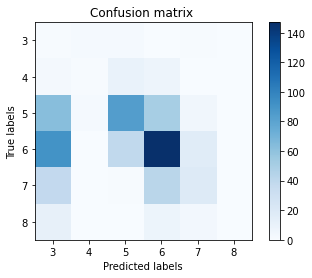

In [29]:
preds = model.predict(df_test)
preds = [i.round() for i in preds]

preds = enc.inverse_transform(preds)
testLabels = enc.inverse_transform(df_testLabels)
cm = confusion_matrix(testLabels, preds)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")

plt.xticks(np.arange(0,len(np.unique(testLabels)),1),np.unique(testLabels))
plt.yticks(np.arange(0,len(np.unique(testLabels)),1),np.unique(testLabels))
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

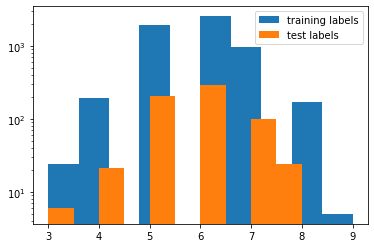

In [30]:
_=plt.hist(enc.inverse_transform(labels),label='training labels')
_=plt.hist(testLabels,label='test labels')
_=plt.yscale('log')
_=plt.legend()

# Discussion

Given the data set used, it's clear the limiting factor for the "goodness" of the network is the quanity of data used to train. To highlight this, we note the above. Here our network has been given an extra (two in this case) layers and more nuerons. As a result, the relaiability of our network decreased significantly. Infact, we can see this as well in our confusion matrix and Loss function vs Epoch plot. The lack of diagonalization and the divergence of of our training and validation loss implies significant overfitting on the model's part. This was made worst by the addition of more nuerons, which from a linear algra perspective gives one more variables to create "stringent" basis that will fit the data, but be useless insofar as one wants to extropolate further - again, this is an issue of data. 
